## Objective

###### Understand how risk factors affect insurance charges. Data from Option 2: Insurance Premiums Dataset (insurance_premiums.csv)

## Imports and Basic Exploration

In [812]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [813]:
insurance = pd.read_csv("https://raw.githubusercontent.com/JonathanBechtel/DAT-02-14/main/Homework/Unit2/data/insurance_premiums.csv")

In [814]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [815]:
insurance.shape

(1338, 7)

In [816]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Further Exploration, Recoding

In [817]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [818]:
# Check for null values - none
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [819]:
# Recode sex and smoker as binary using numpy
insurance['sex'] = np.where(insurance['sex'] == 'male', 0, 1) 
insurance['smoker'] = np.where(insurance['smoker'] == 'no', 0, 1)

In [820]:
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,0,30.97,3,0,northwest,10600.5483
1334,18,1,31.92,0,0,northeast,2205.9808
1335,18,1,36.85,0,0,southeast,1629.8335
1336,21,1,25.80,0,0,southwest,2007.9450
1337,61,1,29.07,0,1,northwest,29141.3603


In [821]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [822]:
# Recode region using LabelBinarizer
region_encoder = LabelBinarizer()
region_encoder.fit(insurance['region'])
transformed = region_encoder.transform(insurance['region'])
lb_df = pd.DataFrame(transformed)
data = pd.concat([insurance, lb_df], axis=1).drop(['region'], axis=1)

In [823]:
data.tail()

,age,sex,bmi,children,smoker,charges,0,1,2,3
1333,50,0,30.97,3,0,10600.5483,0,1,0,0
1334,18,1,31.92,0,0,2205.9808,1,0,0,0
1335,18,1,36.85,0,0,1629.8335,0,0,1,0
1336,21,1,25.80,0,0,2007.9450,0,0,0,1
1337,61,1,29.07,0,1,29141.3603,0,1,0,0


In [824]:
# Change column names
data.columns.values[6] = "northeast"
data.columns.values[7] = "northwest"
data.columns.values[8] = "southeast"
data.columns.values[9] = "southwest"

In [825]:
data.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


In [826]:
# Strongest correlation with smoking status, then a person's age, their bmi 
corr = data.corr()
corr['charges'].sort_values(ascending = False)

charges      1.000000
smoker       0.787251
age          0.299008
bmi          0.198341
southeast    0.073982
children     0.067998
northeast    0.006349
northwest   -0.039905
southwest   -0.043210
sex         -0.057292
Name: charges, dtype: float64

## Performance of simple, multiple, polynomial linear regression

## Simple Regression - bmi to predict charges

In [827]:
# Simple linear regression using bmi to predict charges
X_lr = data[['bmi']]
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X_lr, y, random_state=42)

In [828]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [829]:
lr.score(X_train, y_train)

0.03834873154532481

In [830]:
lr.score(X_test, y_test)

0.04210200521035923

In [831]:
scores = cross_val_score(lr, X_train, y_train, cv = 5, scoring='neg_mean_squared_error')

In [832]:
lr_rmse_scores = np.sqrt(-scores)

In [833]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [834]:
display_scores(lr_rmse_scores)

Scores: [11771.23488385 12327.9017087  11795.22611617 11253.95636734
 12016.06219231]
Mean: 11832.876253676299
Standard deviation: 351.84448705559936


In [835]:
yhat_lr = lr.predict(X_test) # establishing predicted value of y for visualization

In [836]:
import warnings
warnings.simplefilter("ignore")

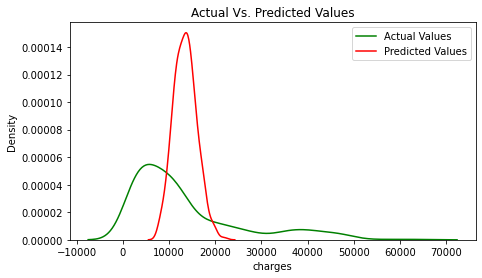

In [837]:
# Time to try multiple LR, this clearly isn't reliable
fig, axes = plt.subplots(1,2, figsize=(16,4))
sns.distplot(y, hist=False, color="g", label="Actual Values",ax=axes[0])
sns.distplot(yhat_lr, hist=False, color="r", label="Predicted Values" , ax=axes[0])
fig.delaxes(axes[1])
axes[0].set_title("Actual Vs. Predicted Values")
axes[0].legend();

## Multiple Regression - smoking, age, bmi to predict charges

In [838]:
X_mr = data[['age','bmi','smoker']]
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X_mr, y, random_state=42)

In [839]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [840]:
lr.score(X_train, y_train)

0.7422732113805752

In [841]:
lr.score(X_test, y_test)

0.7622843807642006

In [842]:
scores = cross_val_score(lr, X_train, y_train, cv = 5, scoring='neg_mean_squared_error')

In [843]:
mr_rmse_scores = np.sqrt(-scores)

In [844]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [845]:
display_scores(scores)

Scores: [-36036698.37330871 -31616512.53179603 -39561379.60366517
 -45012242.5342167  -36278668.36406872]
Mean: -37701100.28141107
Standard deviation: 4443629.0248287


In [846]:
yhat_mr = lr.predict(X_train)

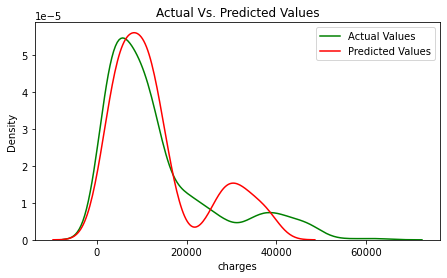

In [847]:
# Definitely an improvement, bus less reliable as charges increase
fig, axes = plt.subplots(1,2, figsize=(16,4))
sns.distplot(y, hist=False, color="g", label="Actual Values",ax=axes[0])
sns.distplot(yhat_mr, hist=False, color="r", label="Predicted Values" , ax=axes[0])
fig.delaxes(axes[1])
axes[0].set_title("Actual Vs. Predicted Values")
axes[0].legend();

## Polynomial Regression

In [848]:
from sklearn.preprocessing import PolynomialFeatures

In [849]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X_mr)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

In [850]:
lr.fit(X_train, y_train)

LinearRegression()

In [851]:
lr.score(X_train, y_train) 

0.8376644502121323

In [852]:
lr.score(X_test, y_test) # Getting better - cubic determined to give the best score on test data 
# via trial and error (should use grid search but ran out of time)

0.8512442588809146

In [853]:
scores = cross_val_score(lr, X_train, y_train, cv = 5, scoring='neg_mean_squared_error')

In [854]:
poly_rmse_scores = np.sqrt(-scores)

In [855]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [856]:
display_scores(scores)

Scores: [-22761381.3407506  -17484428.14941524 -25727242.35634392
 -32587154.93684765 -22496221.20122922]
Mean: -24211285.596917324
Standard deviation: 4954747.0459844405


In [857]:
yhat_poly = lr.predict(X_train)

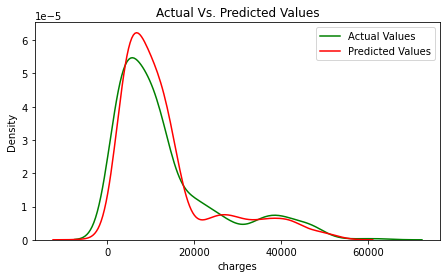

In [858]:
fig, axes = plt.subplots(1,2, figsize=(16,4))
sns.distplot(y, hist=False, color="g", label="Actual Values",ax=axes[0])
sns.distplot(yhat_poly, hist=False, color="r", label="Predicted Values" , ax=axes[0])
fig.delaxes(axes[1])
axes[0].set_title("Actual Vs. Predicted Values")
axes[0].legend();

## Polynomial Regression with Scaled X Using StandardScaler()

In [859]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaler = data[['age','bmi','smoker']]
y = data['charges']

In [860]:
# get cubic features
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly_scaler = poly_features.fit_transform(X_scaler)

# split then scale to avoid test leakage into train
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaler, y, random_state=42)

# scale X
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [861]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [862]:
lr.score(X_train_scaled, y_train) 

0.8376644502121323

In [863]:
lr.score(X_test_scaled, y_test) # No change?

0.8512442588806389

In [864]:
yhat_scaled = lr.predict(X_train_scaled)

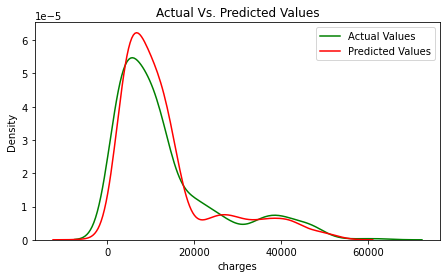

In [865]:
fig, axes = plt.subplots(1,2, figsize=(16,4))
sns.distplot(y, hist=False, color="g", label="Actual Values",ax=axes[0])
sns.distplot(yhat_scaled, hist=False, color="r", label="Predicted Values" , ax=axes[0])
fig.delaxes(axes[1])
axes[0].set_title("Actual Vs. Predicted Values")
axes[0].legend();

## Random Forest Regressor for fun and practice - overfit

In [866]:
X_forest = data[['age','bmi','smoker']]
y = data['charges']

In [867]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X_forest, y, random_state=42)
model = RandomForestRegressor(random_state=42).fit(X_train, y_train)

In [868]:
model.score(X_train, y_train)

0.9711058982475009

In [869]:
model.score(X_test, y_test) # textbook overfit - sizeable increase in error between train and test
# with train as highly accurate

0.8160422488607137

In [870]:
yhat_forest = model.predict(X_train)

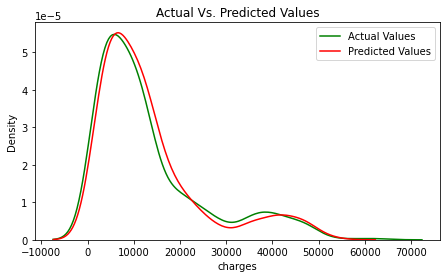

In [871]:
fig, axes = plt.subplots(1,2, figsize=(16,4))
sns.distplot(y, hist=False, color="g", label="Actual Values",ax=axes[0])
sns.distplot(yhat_forest, hist=False, color="r", label="Predicted Values" , ax=axes[0])
fig.delaxes(axes[1])
axes[0].set_title("Actual Vs. Predicted Values")
axes[0].legend();

## Conclusions

### Polynomial regression / polynomial regression with scaled X created the most accurate model for predicting charges with 85% accuracy given input variables age, bmi, and smoking status, indicated early on as having strongest correlation with charges. Areas for further exploration: parameter tuning on the polynomial model with GridSearchCV or similar, further visualizations.